Época 0, Perda (SSE): 1006.5056

Parâmetros aprendidos: m = 2.3474, c = 0.8200
Perda final (SSE): 22.5316
Previsão para x = 15: 36.0307


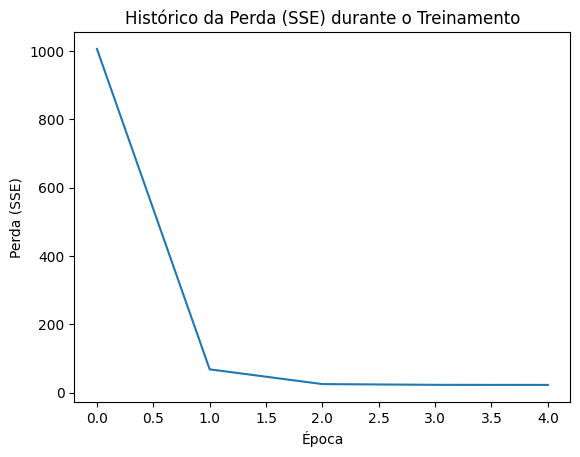

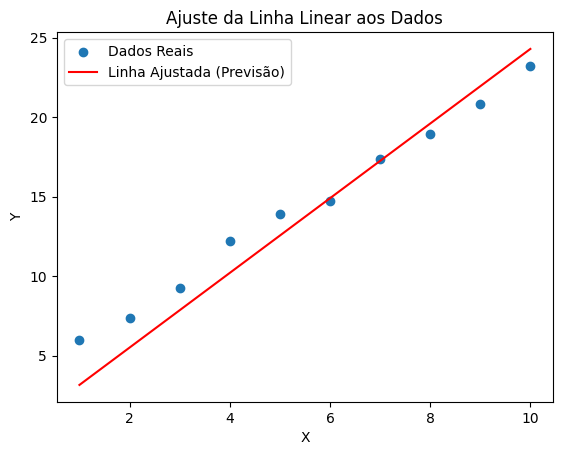

In [23]:
import numpy as np

# 1. Dados de Treinamento (Exemplo simples)
# y_real = 2 * x + 3 + ruído
np.random.seed(0)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_real = np.array([5.1, 7.2, 8.8, 11.1, 13.0, 15.2, 16.9, 19.0, 20.9, 23.0]) + np.random.randn(len(X)) * 0.5

# 2. Função Linear (reutilizando a anterior)
def funcao_linear(x, m, c):
  return m * x + c

# 3. Função de Perda: Soma dos Erros Quadrados (SSE)
def calcular_sse(y_reais, y_previstos):
  return np.sum((y_reais - y_previstos)**2)

# 4. Implementação do Gradiente Descendente para aprendizado
def treinar_modelo_linear(X_treino, y_treino, taxa_aprendizado=0.01, epocas=1000):
  # Inicializa os pesos (m e c) aleatoriamente ou com zeros
  m = np.random.rand()
  c = np.random.rand()

  historico_perda = []

  for epoca in range(epocas):
    # Calcula as previsões do modelo com os pesos atuais
    y_previsto = funcao_linear(X_treino, m, c)

    # Calcula a perda (SSE)
    perda = calcular_sse(y_treino, y_previsto)
    historico_perda.append(perda)

    # Cálculos das derivadas parciais da SSE em relação a m e c
    # Derivada parcial da SSE em relação a m: -2 * sum(X * (y_real - y_previsto))
    # Derivada parcial da SSE em relação a c: -2 * sum(y_real - y_previsto)
    
    # A derivação do SSE = sum((y_real - (mx + c))^2) em relação a 'm' e 'c'
    # d(SSE)/dm = sum(2 * (y_real - (mx + c)) * (-x)) = -2 * sum(x * (y_real - y_previsto))
    # d(SSE)/dc = sum(2 * (y_real - (mx + c)) * (-1)) = -2 * sum(y_real - y_previsto)
    
    gradiente_m = -2 * np.sum(X_treino * (y_treino - y_previsto))
    gradiente_c = -2 * np.sum(y_treino - y_previsto)

    # Atualiza os pesos (m e c) usando o gradiente descendente
    m = m - taxa_aprendizado * gradiente_m
    c = c - taxa_aprendizado * gradiente_c

    # Opcional: Imprimir a perda a cada X épocas para acompanhar o progresso
    if epoca % 100 == 0:
      print(f"Época {epoca}, Perda (SSE): {perda:.4f}")

  return m, c, historico_perda

# Treinar o modelo
m_final, c_final, perda_historico = treinar_modelo_linear(X, y_real, taxa_aprendizado=0.001, epocas=5)

print(f"\nParâmetros aprendidos: m = {m_final:.4f}, c = {c_final:.4f}")
print(f"Perda final (SSE): {perda_historico[-1]:.4f}")

# Exemplo de previsão com os parâmetros aprendidos
entrada_nova = 15
previsao_nova = funcao_linear(entrada_nova, m_final, c_final)
print(f"Previsão para x = {entrada_nova}: {previsao_nova:.4f}")

# Opcional: Visualizar a perda ao longo do treinamento (requer matplotlib)
try:
    import matplotlib.pyplot as plt
    plt.plot(perda_historico)
    plt.title("Histórico da Perda (SSE) durante o Treinamento")
    plt.xlabel("Época")
    plt.ylabel("Perda (SSE)")
    plt.show()

    # Visualizar a linha ajustada vs. os dados reais
    plt.scatter(X, y_real, label="Dados Reais")
    plt.plot(X, funcao_linear(X, m_final, c_final), color='red', label="Linha Ajustada (Previsão)")
    plt.title("Ajuste da Linha Linear aos Dados")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

except ImportError:
    print("Matplotlib não está instalado. Não foi possível gerar os gráficos.")